In [ ]:
import sys
import os
import cv2
import math

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

from PIL import Image
from glob import glob

from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

from scipy.misc import imread, imsave
from __future__ import print_function, division

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6291968   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 6,423,553
Trainable params: 6,423,553
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


0 0 [D loss: 1.268041, acc.: 48.05%] [G loss: 0.266907]


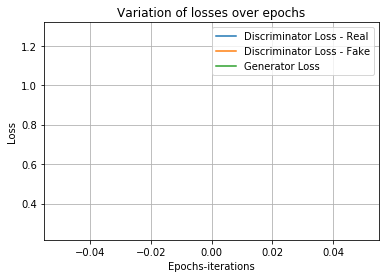

256
0 1 [D loss: 0.892655, acc.: 48.83%] [G loss: 0.406864]
256
0 2 [D loss: 0.575172, acc.: 62.89%] [G loss: 0.711212]
256
0 3 [D loss: 0.348607, acc.: 77.34%] [G loss: 1.121741]
256
0 4 [D loss: 0.301946, acc.: 88.67%] [G loss: 1.392242]
256
0 5 [D loss: 0.204269, acc.: 92.58%] [G loss: 1.610936]
256
0 6 [D loss: 0.177365, acc.: 92.97%] [G loss: 1.925146]
256
0 7 [D loss: 0.149531, acc.: 96.09%] [G loss: 2.230622]
256
0 8 [D loss: 0.152630, acc.: 95.31%] [G loss: 2.352928]
256
0 9 [D loss: 0.118945, acc.: 98.05%] [G loss: 2.520801]
256
0 10 [D loss: 0.103385, acc.: 98.44%] [G loss: 2.622675]
256
0 11 [D loss: 0.138578, acc.: 96.09%] [G loss: 2.673290]
256
0 12 [D loss: 0.114153, acc.: 98.83%] [G loss: 2.984814]
256
0 13 [D loss: 0.109177, acc.: 97.27%] [G loss: 3.065315]
256
0 14 [D loss: 0.128368, acc.: 96.09%] [G loss: 3.261345]
256
0 15 [D loss: 0.080885, acc.: 99.22%] [G loss: 3.422991]
256
0 16 [D loss: 0.071450, acc.: 99.22%] [G loss: 3.502892]
256
0 17 [D loss: 0.116063, acc.:

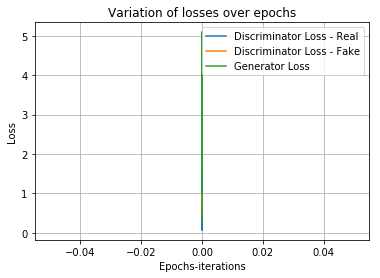

256
0 201 [D loss: 0.392531, acc.: 82.81%] [G loss: 1.558420]
256
0 202 [D loss: 0.479820, acc.: 75.39%] [G loss: 1.672559]
256
0 203 [D loss: 0.493027, acc.: 77.73%] [G loss: 1.662451]
256
0 204 [D loss: 0.500864, acc.: 72.27%] [G loss: 1.614938]
256
0 205 [D loss: 0.665975, acc.: 62.89%] [G loss: 1.615503]
256
0 206 [D loss: 0.479014, acc.: 78.91%] [G loss: 1.504240]
256
0 207 [D loss: 0.467468, acc.: 77.34%] [G loss: 1.501348]
256
0 208 [D loss: 0.339681, acc.: 86.33%] [G loss: 1.725211]
256
0 209 [D loss: 0.398016, acc.: 84.38%] [G loss: 1.762918]
256
0 210 [D loss: 0.411610, acc.: 85.94%] [G loss: 1.759206]
256
0 211 [D loss: 0.436491, acc.: 77.34%] [G loss: 1.543966]
256
0 212 [D loss: 0.438737, acc.: 81.64%] [G loss: 1.432626]
256
0 213 [D loss: 0.405271, acc.: 82.81%] [G loss: 1.706632]
256
0 214 [D loss: 0.483234, acc.: 76.56%] [G loss: 1.632661]
256
0 215 [D loss: 0.437605, acc.: 78.52%] [G loss: 1.463497]
256
0 216 [D loss: 0.388071, acc.: 82.03%] [G loss: 1.685669]
256
0 21

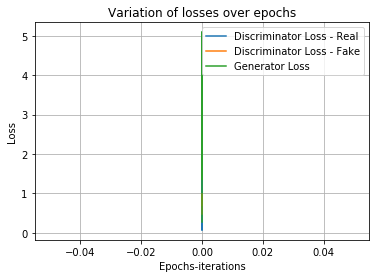

256
0 401 [D loss: 0.564080, acc.: 69.92%] [G loss: 1.583482]
256
0 402 [D loss: 0.427160, acc.: 80.47%] [G loss: 1.545490]
256
0 403 [D loss: 0.407510, acc.: 82.42%] [G loss: 1.509996]
256
0 404 [D loss: 0.410266, acc.: 84.38%] [G loss: 1.543626]
256
0 405 [D loss: 0.411109, acc.: 84.38%] [G loss: 1.540453]
256
0 406 [D loss: 0.383262, acc.: 85.55%] [G loss: 1.552112]
256
0 407 [D loss: 0.460133, acc.: 79.69%] [G loss: 1.489077]
256
0 408 [D loss: 0.460093, acc.: 78.91%] [G loss: 1.689739]
256
0 409 [D loss: 0.465709, acc.: 75.39%] [G loss: 1.578971]
256
0 410 [D loss: 0.471795, acc.: 75.39%] [G loss: 1.825729]
256
0 411 [D loss: 0.498177, acc.: 77.73%] [G loss: 1.651543]
256
0 412 [D loss: 0.647928, acc.: 75.78%] [G loss: 1.220894]
256
0 413 [D loss: 0.370022, acc.: 84.77%] [G loss: 1.336009]
256
0 414 [D loss: 0.483160, acc.: 73.05%] [G loss: 1.290853]
256
0 415 [D loss: 0.375472, acc.: 83.98%] [G loss: 1.514821]
256
0 416 [D loss: 0.527756, acc.: 72.66%] [G loss: 1.457980]
256
0 41

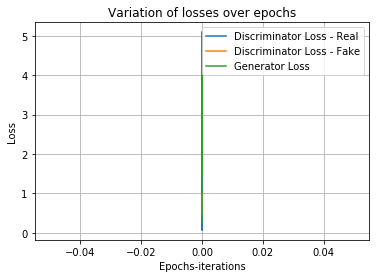

256
0 601 [D loss: 0.497411, acc.: 73.05%] [G loss: 1.405528]
256
0 602 [D loss: 0.462288, acc.: 78.91%] [G loss: 1.491930]
256
0 603 [D loss: 0.446327, acc.: 80.47%] [G loss: 1.363302]
256
0 604 [D loss: 0.444682, acc.: 80.08%] [G loss: 1.671155]
256
0 605 [D loss: 0.596185, acc.: 66.02%] [G loss: 1.694913]
256
0 606 [D loss: 0.750529, acc.: 58.20%] [G loss: 1.781602]
256
0 607 [D loss: 0.699219, acc.: 64.84%] [G loss: 1.069241]
256
0 608 [D loss: 0.566531, acc.: 71.48%] [G loss: 1.284878]
256
0 609 [D loss: 0.560433, acc.: 69.14%] [G loss: 1.306009]
256
0 610 [D loss: 0.533296, acc.: 73.05%] [G loss: 1.669503]
256
0 611 [D loss: 0.659403, acc.: 66.41%] [G loss: 1.333082]
256
0 612 [D loss: 0.431027, acc.: 80.86%] [G loss: 1.698744]
256
0 613 [D loss: 0.626181, acc.: 69.53%] [G loss: 1.192190]
256
0 614 [D loss: 0.453581, acc.: 78.12%] [G loss: 1.219025]
256
0 615 [D loss: 0.451652, acc.: 80.08%] [G loss: 1.324910]
256
0 616 [D loss: 0.425224, acc.: 78.12%] [G loss: 1.286545]
256
0 61

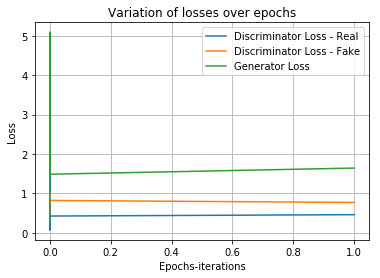

256
1 1 [D loss: 0.514193, acc.: 76.17%] [G loss: 1.518587]
256
1 2 [D loss: 0.478252, acc.: 80.47%] [G loss: 1.496865]
256
1 3 [D loss: 0.429644, acc.: 81.25%] [G loss: 1.355277]
256
1 4 [D loss: 0.416932, acc.: 82.81%] [G loss: 1.279776]
256
1 5 [D loss: 0.396691, acc.: 81.25%] [G loss: 1.587955]
256
1 6 [D loss: 0.467257, acc.: 73.83%] [G loss: 1.522293]
256
1 7 [D loss: 0.411120, acc.: 81.64%] [G loss: 1.656638]
256
1 8 [D loss: 0.514506, acc.: 74.61%] [G loss: 1.480821]
256
1 9 [D loss: 0.439426, acc.: 83.20%] [G loss: 1.609811]
256
1 10 [D loss: 0.533905, acc.: 71.48%] [G loss: 1.529259]
256
1 11 [D loss: 0.480401, acc.: 74.61%] [G loss: 1.436381]
256
1 12 [D loss: 0.476997, acc.: 76.56%] [G loss: 1.442839]
256
1 13 [D loss: 0.507234, acc.: 74.22%] [G loss: 1.509324]
256
1 14 [D loss: 0.472414, acc.: 76.56%] [G loss: 1.444016]
256
1 15 [D loss: 0.454877, acc.: 75.78%] [G loss: 1.379650]
256
1 16 [D loss: 0.506675, acc.: 78.52%] [G loss: 1.521708]
256
1 17 [D loss: 0.459679, acc.:

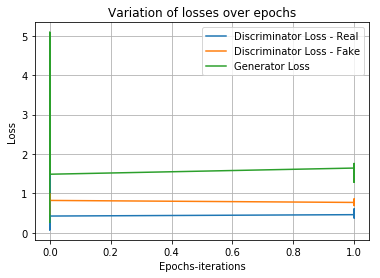

256
1 201 [D loss: 0.503615, acc.: 77.73%] [G loss: 1.538598]
256
1 202 [D loss: 0.588095, acc.: 69.53%] [G loss: 1.563785]
256
1 203 [D loss: 0.405192, acc.: 85.55%] [G loss: 1.667567]
256
1 204 [D loss: 0.515625, acc.: 75.00%] [G loss: 1.416377]
256
1 205 [D loss: 0.551058, acc.: 73.44%] [G loss: 1.540791]
256
1 206 [D loss: 0.586123, acc.: 72.27%] [G loss: 1.462061]
256
1 207 [D loss: 0.574973, acc.: 67.58%] [G loss: 1.505328]
256
1 208 [D loss: 0.402699, acc.: 82.81%] [G loss: 1.584306]
256
1 209 [D loss: 0.475216, acc.: 74.61%] [G loss: 1.593583]
256
1 210 [D loss: 0.419447, acc.: 82.42%] [G loss: 1.452753]
256
1 211 [D loss: 0.445850, acc.: 82.03%] [G loss: 1.443794]
256
1 212 [D loss: 0.483758, acc.: 76.95%] [G loss: 1.410757]
256
1 213 [D loss: 0.434502, acc.: 81.25%] [G loss: 1.512416]
256
1 214 [D loss: 0.428804, acc.: 77.34%] [G loss: 1.584226]
256
1 215 [D loss: 0.425478, acc.: 84.38%] [G loss: 1.493047]
256
1 216 [D loss: 0.449915, acc.: 75.00%] [G loss: 1.559621]
256
1 21

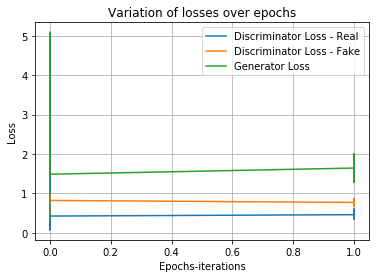

256
1 401 [D loss: 0.484297, acc.: 75.00%] [G loss: 1.688789]
256
1 402 [D loss: 0.412812, acc.: 78.12%] [G loss: 1.602706]
256
1 403 [D loss: 0.417453, acc.: 80.86%] [G loss: 1.804018]
256
1 404 [D loss: 0.459461, acc.: 78.52%] [G loss: 1.637803]
256
1 405 [D loss: 0.444910, acc.: 81.64%] [G loss: 1.621332]
256
1 406 [D loss: 0.548277, acc.: 70.31%] [G loss: 1.596995]
256
1 407 [D loss: 0.445503, acc.: 80.47%] [G loss: 1.501128]
256
1 408 [D loss: 0.426606, acc.: 78.52%] [G loss: 1.606142]
256
1 409 [D loss: 0.413930, acc.: 79.30%] [G loss: 1.717437]
256
1 410 [D loss: 0.370247, acc.: 86.72%] [G loss: 1.651909]
256
1 411 [D loss: 0.440040, acc.: 81.64%] [G loss: 1.641737]
256
1 412 [D loss: 0.401668, acc.: 80.86%] [G loss: 1.753504]
256
1 413 [D loss: 0.490074, acc.: 76.95%] [G loss: 1.514570]
256
1 414 [D loss: 0.457634, acc.: 77.34%] [G loss: 1.696356]
256
1 415 [D loss: 0.454147, acc.: 78.91%] [G loss: 1.838209]
256
1 416 [D loss: 0.384234, acc.: 83.98%] [G loss: 1.813664]
256
1 41

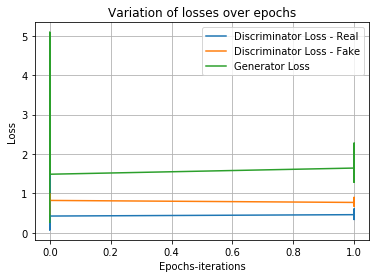

256
1 601 [D loss: 0.514490, acc.: 73.83%] [G loss: 1.781414]
256
1 602 [D loss: 0.548301, acc.: 71.09%] [G loss: 1.675210]
256
1 603 [D loss: 0.516002, acc.: 77.34%] [G loss: 1.736749]
256
1 604 [D loss: 0.329233, acc.: 87.11%] [G loss: 1.723174]
256
1 605 [D loss: 0.440999, acc.: 77.34%] [G loss: 1.523911]
256
1 606 [D loss: 0.517082, acc.: 76.95%] [G loss: 1.680288]
256
1 607 [D loss: 0.457158, acc.: 77.73%] [G loss: 1.783126]
256
1 608 [D loss: 0.552052, acc.: 73.05%] [G loss: 1.767986]
256
1 609 [D loss: 0.497196, acc.: 76.95%] [G loss: 1.694789]
256
1 610 [D loss: 0.421293, acc.: 82.42%] [G loss: 1.608230]
256
1 611 [D loss: 0.431698, acc.: 76.95%] [G loss: 1.670523]
256
1 612 [D loss: 0.381368, acc.: 83.59%] [G loss: 1.712587]
256
1 613 [D loss: 0.443892, acc.: 82.42%] [G loss: 1.652888]
256
1 614 [D loss: 0.454806, acc.: 76.95%] [G loss: 1.516824]
256
1 615 [D loss: 0.430313, acc.: 80.08%] [G loss: 1.576116]
256
1 616 [D loss: 0.423394, acc.: 82.81%] [G loss: 1.545191]
256
1 61

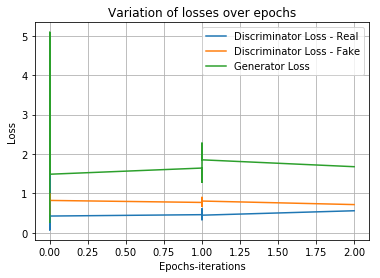

256
2 1 [D loss: 0.410346, acc.: 79.30%] [G loss: 1.605608]
256
2 2 [D loss: 0.416337, acc.: 80.47%] [G loss: 1.658291]
256
2 3 [D loss: 0.530849, acc.: 73.05%] [G loss: 1.521800]
256
2 4 [D loss: 0.446330, acc.: 76.95%] [G loss: 1.779589]
256
2 5 [D loss: 0.353927, acc.: 83.20%] [G loss: 2.012451]
256
2 6 [D loss: 0.491574, acc.: 78.52%] [G loss: 1.823130]
256
2 7 [D loss: 0.460379, acc.: 75.39%] [G loss: 1.550772]
256
2 8 [D loss: 0.444605, acc.: 76.95%] [G loss: 1.642893]
256
2 9 [D loss: 0.407505, acc.: 78.12%] [G loss: 1.758671]
256
2 10 [D loss: 0.424074, acc.: 82.42%] [G loss: 1.603421]
256
2 11 [D loss: 0.531589, acc.: 74.61%] [G loss: 1.583508]
256
2 12 [D loss: 0.450327, acc.: 74.22%] [G loss: 1.795254]
256
2 13 [D loss: 0.503395, acc.: 75.78%] [G loss: 1.777373]
256
2 14 [D loss: 0.476260, acc.: 79.30%] [G loss: 1.785167]
256
2 15 [D loss: 0.417325, acc.: 81.64%] [G loss: 1.729256]
256
2 16 [D loss: 0.418054, acc.: 83.20%] [G loss: 1.739013]
256
2 17 [D loss: 0.514656, acc.:

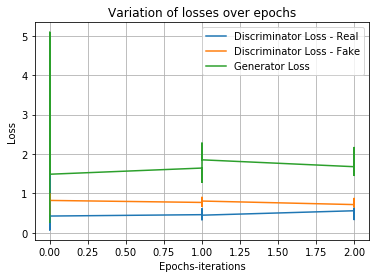

256
2 201 [D loss: 0.407069, acc.: 79.69%] [G loss: 1.663585]
256
2 202 [D loss: 0.433489, acc.: 78.52%] [G loss: 1.615110]
256
2 203 [D loss: 0.491305, acc.: 73.83%] [G loss: 1.555917]
256
2 204 [D loss: 0.408568, acc.: 82.03%] [G loss: 1.750154]
256
2 205 [D loss: 0.567696, acc.: 70.31%] [G loss: 1.738550]
256
2 206 [D loss: 0.482218, acc.: 78.52%] [G loss: 1.684510]
256
2 207 [D loss: 0.495943, acc.: 74.22%] [G loss: 1.577451]
256
2 208 [D loss: 0.406685, acc.: 78.12%] [G loss: 1.639194]
256
2 209 [D loss: 0.451277, acc.: 76.56%] [G loss: 1.587450]
256
2 210 [D loss: 0.495710, acc.: 76.56%] [G loss: 1.610127]
256
2 211 [D loss: 0.377819, acc.: 84.38%] [G loss: 1.626351]
256
2 212 [D loss: 0.489846, acc.: 75.00%] [G loss: 1.813322]
256
2 213 [D loss: 0.500354, acc.: 76.56%] [G loss: 1.665428]
256
2 214 [D loss: 0.521346, acc.: 73.83%] [G loss: 1.623060]
256
2 215 [D loss: 0.483538, acc.: 75.00%] [G loss: 1.729740]
256
2 216 [D loss: 0.510782, acc.: 72.66%] [G loss: 1.637622]
256
2 21

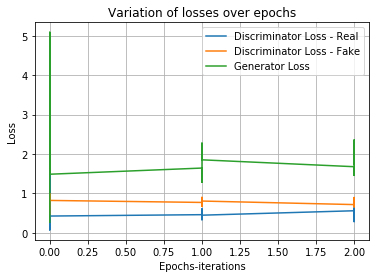

256
2 401 [D loss: 0.407503, acc.: 78.52%] [G loss: 1.796084]
256
2 402 [D loss: 0.460885, acc.: 78.91%] [G loss: 1.746867]
256
2 403 [D loss: 0.404031, acc.: 83.98%] [G loss: 1.768873]
256
2 404 [D loss: 0.393252, acc.: 82.81%] [G loss: 1.856295]
256
2 405 [D loss: 0.438899, acc.: 77.73%] [G loss: 1.867452]
256
2 406 [D loss: 0.426369, acc.: 80.47%] [G loss: 1.853391]
256
2 407 [D loss: 0.536526, acc.: 76.95%] [G loss: 1.823311]
256
2 408 [D loss: 0.504011, acc.: 73.44%] [G loss: 1.688840]
256
2 409 [D loss: 0.570719, acc.: 70.31%] [G loss: 1.591277]
256
2 410 [D loss: 0.429906, acc.: 83.20%] [G loss: 1.637630]
256
2 411 [D loss: 0.408795, acc.: 80.47%] [G loss: 1.832749]
256
2 412 [D loss: 0.476504, acc.: 77.34%] [G loss: 1.806816]
256
2 413 [D loss: 0.452426, acc.: 76.56%] [G loss: 1.789810]
256
2 414 [D loss: 0.542002, acc.: 72.66%] [G loss: 1.861574]
256
2 415 [D loss: 0.502041, acc.: 76.56%] [G loss: 2.174428]
256
2 416 [D loss: 0.501065, acc.: 74.22%] [G loss: 2.075953]
256
2 41

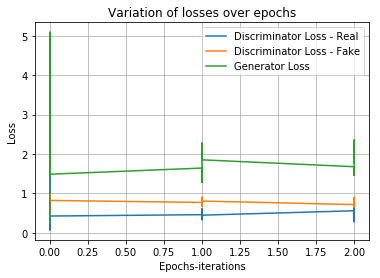

256
2 601 [D loss: 0.566013, acc.: 69.92%] [G loss: 1.707181]
256
2 602 [D loss: 0.465066, acc.: 75.39%] [G loss: 1.816588]
256
2 603 [D loss: 0.550211, acc.: 76.56%] [G loss: 1.928319]
256
2 604 [D loss: 0.473210, acc.: 75.39%] [G loss: 1.811176]
256
2 605 [D loss: 0.502798, acc.: 74.22%] [G loss: 1.949377]
256
2 606 [D loss: 0.476876, acc.: 79.69%] [G loss: 1.687597]
256
2 607 [D loss: 0.486977, acc.: 80.08%] [G loss: 1.926810]
256
2 608 [D loss: 0.528791, acc.: 75.39%] [G loss: 1.678183]
256
2 609 [D loss: 0.398688, acc.: 85.55%] [G loss: 1.733250]
256
2 610 [D loss: 0.396611, acc.: 82.81%] [G loss: 1.723285]
256
2 611 [D loss: 0.511654, acc.: 78.12%] [G loss: 1.865130]
256
2 612 [D loss: 0.544960, acc.: 74.22%] [G loss: 1.854185]
256
2 613 [D loss: 0.517731, acc.: 76.17%] [G loss: 1.970089]
256
2 614 [D loss: 0.470847, acc.: 77.34%] [G loss: 2.149631]
256
2 615 [D loss: 0.472960, acc.: 78.12%] [G loss: 2.129756]
256
2 616 [D loss: 0.566320, acc.: 69.92%] [G loss: 1.791635]
256
2 61

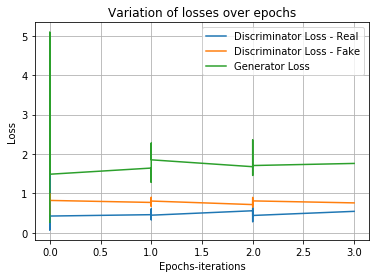

256
3 1 [D loss: 0.483165, acc.: 76.95%] [G loss: 1.796107]
256
3 2 [D loss: 0.459722, acc.: 79.30%] [G loss: 1.965566]
256
3 3 [D loss: 0.438854, acc.: 80.08%] [G loss: 1.830032]
256
3 4 [D loss: 0.410907, acc.: 81.64%] [G loss: 1.850286]
256
3 5 [D loss: 0.485322, acc.: 79.69%] [G loss: 1.757453]
256
3 6 [D loss: 0.489331, acc.: 75.78%] [G loss: 1.677404]
256
3 7 [D loss: 0.505990, acc.: 76.56%] [G loss: 1.567181]
256
3 8 [D loss: 0.412197, acc.: 82.42%] [G loss: 1.732057]
256
3 9 [D loss: 0.457889, acc.: 75.00%] [G loss: 1.763790]
256
3 10 [D loss: 0.493918, acc.: 76.95%] [G loss: 1.744905]
256
3 11 [D loss: 0.516295, acc.: 75.39%] [G loss: 1.872317]
256
3 12 [D loss: 0.475112, acc.: 78.52%] [G loss: 1.756114]
256
3 13 [D loss: 0.472790, acc.: 77.34%] [G loss: 1.837613]
256
3 14 [D loss: 0.470382, acc.: 78.12%] [G loss: 1.701235]
256
3 15 [D loss: 0.529132, acc.: 71.88%] [G loss: 1.727431]
256
3 16 [D loss: 0.461753, acc.: 78.91%] [G loss: 1.669661]
256
3 17 [D loss: 0.486477, acc.:

In [2]:
class DeepFakeGAN():
    def __init__(self):
        self.no_channels = 3
        self.img_rows_size = 64 
        self.img_cols_size = 64
        self.img_shape = (self.img_rows_size, self.img_cols_size, self.no_channels)
        loss_bi = 'binary_crossentropy'
        metric_ac = 'accuracy'
        optimizer = Adam(0.0002, 0.5)
        
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator_model()
        self.discriminator.compile(loss=loss_bi, optimizer=optimizer,metrics=[metric_ac])
        
        # Build and compile the generator
        self.generator = self.build_generator_model()
        self.generator.compile(loss=loss_bi, optimizer=optimizer)

        # The generator takes noise as input and generated imgs
        inp = Input(shape=(4096,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The valid takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator) takes
        # noise as input => generates images => determines validity 
        self.combined = Model(inp, valid)
        self.combined.compile(loss=loss_bi, optimizer=optimizer)

    def build_generator_model(self):
        noise_shape = (4096,)
        
        model = Sequential()

        divisor = 4
        model.add(Dense(16 * (self.img_rows_size // divisor) * (self.img_cols_size // divisor), input_shape=noise_shape))
        model.add(LeakyReLU(0.2))
        model.add(BatchNormalization())
        model.add(Reshape((self.img_rows_size // divisor, self.img_cols_size // divisor, 16)))

        model.add(UpSampling2D())
        model.add(Conv2D(128, (5,5), padding='same'))
        model.add(LeakyReLU(0.2))
        model.add(BatchNormalization())

        model.add(UpSampling2D())
        model.add(Conv2D(self.no_channels, (5,5), padding='same', activation='tanh'))
        model.summary()
        return model

        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)
        return Model(noise, img)

    def build_discriminator_model(self):
        img_shape = (self.img_rows_size, self.img_cols_size, self.no_channels)
        
        model = Sequential()
        model.add(Flatten(input_shape=img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=img_shape)
        validity = model(img)
        return Model(img, validity)
    
    def get_image(self, image_path, width, height, mode):  
        image = Image.open(image_path)
        image = image.resize([width, height])
        return np.array(image.convert(mode))

    def get_batch(self, image_files, width, height, mode):
        data_batch = np.array([self.get_image(sample_file, width, height, mode) for sample_file in image_files])
        
        return data_batch    
    def add_noise(self,image):
        ch = 3
        row,col = 64,64
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        image = cv2.resize(noisy,(64, 64))    
        return image
    
    def plot(d_loss_logs_r_a,d_loss_logs_f_a,g_loss_logs_a):
        #Generate the plot at the end of training
        #Convert the log lists to numpy arrays
        d_loss_logs_r_a = np.array(d_loss_logs_r_a)
        d_loss_logs_f_a = np.array(d_loss_logs_f_a)
        g_loss_logs_a = np.array(g_loss_logs_a)
        plt.plot(d_loss_logs_r_a[:,0], d_loss_logs_r_a[:,1], label="Discriminator Loss - Real")
        plt.plot(d_loss_logs_f_a[:,0], d_loss_logs_f_a[:,1], label="Discriminator Loss - Fake")
        plt.plot(g_loss_logs_a[:,0], g_loss_logs_a[:,1], label="Generator Loss")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Variation of losses over epochs')
        plt.grid(True)
        plt.show()    
        
    def train(self, epochs, batch_size=128, save_interval=50):
        data_dir = "../input/img_align_celeba/img_align_celeba"
        filepaths=os.listdir(data_dir)
        
        #Rescale -1 to 1
        
        half_batch = int(batch_size / 2)
        #Create lists for logging the losses
        d_loss_logs_r = []
        d_loss_logs_f = []
        g_loss_logs = []
        n_iterations=math.floor(len(filepaths)/batch_size)
        print(n_iterations)
        for epoch in range(epochs):
            # ---------------------
            #  Train Discriminator
            # ---------------------
            # Select a random half batch of images
            for ite in range(n_iterations):
                X_train = self.get_batch(glob(os.path.join(data_dir, '*.jpg'))[ite*batch_size:(ite+1)*batch_size], 64, 64, 'RGB')
                X_train = (X_train.astype(np.float32) - 127.5) / 127.5
                X_train=np.array([self.add_noise(image) for image in X_train])
                print(X_train.shape[0])
                idx = np.random.randint(0, X_train.shape[0], half_batch)
                imgs = X_train[idx]
                noise = np.random.normal(0, 1, (half_batch, 4096))
                # Generate a half batch of new images
                gen_imgs = self.generator.predict(noise)
                # Train the discriminator
                d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
                # ---------------------
                #  Train Generator
                # ---------------------
                noise = np.random.normal(0, 1, (batch_size, 4096))
                # The generator wants the discriminator to label the generated samples
                # as valid (ones)
                valid_y = np.array([1] * batch_size)
                # Train the generator
                g_loss = self.combined.train_on_batch(noise, valid_y)
                # Plot the progress
                print ("%d %d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch,ite, d_loss[0], 100*d_loss[1], g_loss))

                #Append the logs with the loss values in each training step
                d_loss_logs_r.append([epoch, d_loss[0]])
                d_loss_logs_f.append([epoch, d_loss[1]])
                g_loss_logs.append([epoch, g_loss])

                d_loss_logs_r_a = np.array(d_loss_logs_r)
                d_loss_logs_f_a = np.array(d_loss_logs_f)
                g_loss_logs_a = np.array(g_loss_logs)

                # If at save interval => save generated image samples
                if ite % save_interval == 0:
                    self.save_imgs(epoch,ite)

                    plt.plot(d_loss_logs_r_a[:,0], d_loss_logs_r_a[:,1], label="Discriminator Loss - Real")
                    plt.plot(d_loss_logs_f_a[:,0], d_loss_logs_f_a[:,1], label="Discriminator Loss - Fake")
                    plt.plot(g_loss_logs_a[:,0], g_loss_logs_a[:,1], label="Generator Loss")
                    plt.xlabel('Epochs-iterations')
                    plt.ylabel('Loss')
                    plt.legend()
                    plt.title('Variation of losses over epochs')
                    plt.grid(True)
                    plt.show()    
            model_json = self.generator.to_json()
            with open("model"+str(epoch)+".json", "w") as json_file:
                json_file.write(model_json)
            # serialize weights to H5
            self.generator.save_weights("model"+str(epoch)+".h5")
            print("Saved model to disk")
        
    def save_imgs(self, epoch,iteration):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, 4096))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = (1/2.5) * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,:])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig(str(epoch)+"-"+str(iteration)+".png")
        plt.close()


if __name__ == '__main__':
    gan = DeepFakeGAN()
    gan.train(epochs=6, batch_size=256, save_interval=200)

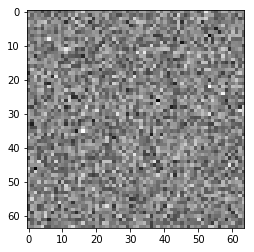

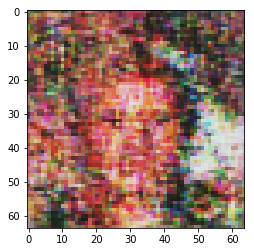

In [3]:
img0=np.random.normal(0, 1, (1, 4096))
plt.imshow(img0.reshape((64,64)),cmap='gray')
plt.show()

img2 = gan.generator.predict(img0)[0]
gen_imgs2 = (1/2.5) * img2 + 0.5
plt.imshow(gen_imgs2)
plt.show()

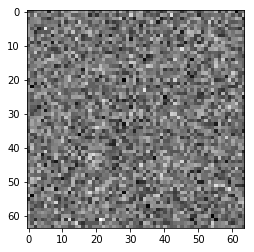

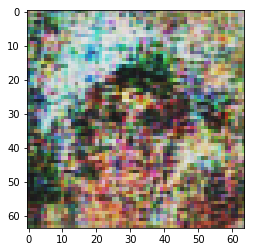

In [4]:
img0=np.random.normal(0, 1, (1, 4096))
plt.imshow(img0.reshape((64,64)),cmap='gray')
plt.show()

img2 = gan.generator.predict(img0)[0]
gen_imgs2 = (1/2.5) * img2 + 0.5
plt.imshow(gen_imgs2)
plt.show()

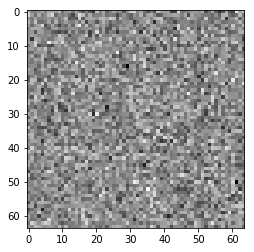

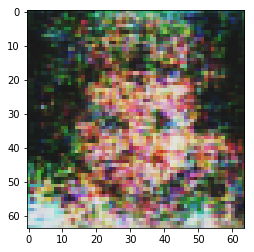

In [5]:
img0=np.random.normal(0, 1, (1, 4096))
plt.imshow(img0.reshape((64,64)),cmap='gray')
plt.show()

img2 = gan.generator.predict(img0)[0]
gen_imgs2 = (1/2.5) * img2 + 0.5
plt.imshow(gen_imgs2)
plt.show()

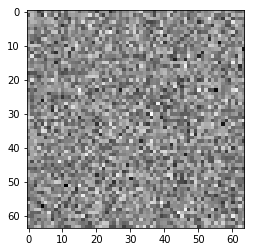

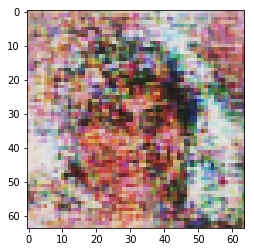

In [6]:
img0=np.random.normal(0, 1, (1, 4096))
plt.imshow(img0.reshape((64,64)),cmap='gray')
plt.show()

img2 = gan.generator.predict(img0)[0]
gen_imgs2 = (1/2.5) * img2 + 0.5
plt.imshow(gen_imgs2)
plt.show()

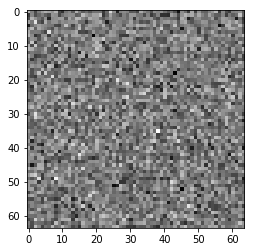

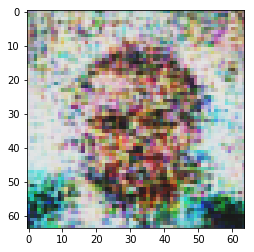

In [7]:
img0=np.random.normal(0, 1, (1, 4096))
plt.imshow(img0.reshape((64,64)),cmap='gray')
plt.show()

img2 = gan.generator.predict(img0)[0]
gen_imgs2 = (1/2.5) * img2 + 0.5
plt.imshow(gen_imgs2)
plt.show()

Code Credits:<br>
Few code logics has been taken from different sources avaialble on Google after understanding the implementation. <br>
https://www.tensorflow.org/tutorials/generative/dcgan <br>
https://www.kaggle.com/rajatuchiha/gan-final-version <br>
https://www.geeksforgeeks.org/deep-convolutional-gan-with-keras/ <br>